#**Maestría en Inteligencia Artificial Aplicada**
## **Tecnológico de Monterrey**

## NOMBRE DE LA ENTREGA: Reto 2 -> Entrega 2 (18/11) -> Limpieza, análisis, visualización y kmeans,-> Clasificación-ensambles 

## ALUMNO: **Jesus Esteiner Alonso Moreno - A01793554**
## MATERIA: **Curso: Ciencia de Datos**
## PROFESOR: **Phd Maria de la Paz Rico**
## FECHA: **18 NOVIEMBRE DE 2022**
## MODALIDAD: **Individual**

In [1]:
import requests, zipfile
from io import BytesIO

import pandas as pd

# Datos_de_calidad_del_agua_2020/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv
url='http://201.116.60.46/Datos_de_calidad_del_agua_de_5000_sitios_de_monitoreo.zip'
req=requests.get(url)

# Descomprimir el archivo
zipfile.ZipFile(BytesIO(req.content)).extractall('zip/')

# Generar el DataFrame
df=pd.read_csv('zip/Datos_de_calidad_del_agua_2020/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv', encoding = 'latin1')
df_copy = df.copy()

# Iniciemos el análisis de los datos
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 57 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CLAVE                 1068 non-null   object 
 1   SITIO                 1068 non-null   object 
 2   ORGANISMO_DE_CUENCA   1068 non-null   object 
 3   ESTADO                1068 non-null   object 
 4   MUNICIPIO             1068 non-null   object 
 5   ACUIFERO              1068 non-null   object 
 6   SUBTIPO               1068 non-null   object 
 7   LONGITUD              1068 non-null   float64
 8   LATITUD               1068 non-null   float64
 9   PERIODO               1068 non-null   int64  
 10  ALC_mg/L              1064 non-null   float64
 11  CALIDAD_ALC           1064 non-null   object 
 12  CONDUCT_mS/cm         1062 non-null   float64
 13  CALIDAD_CONDUC        1062 non-null   object 
 14  SDT_mg/L              0 non-null      float64
 15  SDT_M_mg/L           

In [2]:
# Verificación de los datos
df_copy.head(5).T

,0,1,2,3,4
CLAVE,DLAGU6,DLAGU6516,DLAGU7,DLAGU9,DLBAJ107
SITIO,POZO SAN GIL,POZO R013 CAÑADA HONDA,POZO COSIO,POZO EL SALITRILLO,RANCHO EL TECOLOTE
ORGANISMO_DE_CUENCA,LERMA SANTIAGO PACIFICO,LERMA SANTIAGO PACIFICO,LERMA SANTIAGO PACIFICO,LERMA SANTIAGO PACIFICO,PENINSULA DE BAJA CALIFORNIA
ESTADO,AGUASCALIENTES,AGUASCALIENTES,AGUASCALIENTES,AGUASCALIENTES,BAJA CALIFORNIA SUR
MUNICIPIO,ASIENTOS,AGUASCALIENTES,COSIO,RINCON DE ROMOS,LA PAZ
ACUIFERO,VALLE DE CHICALOTE,VALLE DE CHICALOTE,VALLE DE AGUASCALIENTES,VALLE DE AGUASCALIENTES,TODOS SANTOS
SUBTIPO,POZO,POZO,POZO,POZO,POZO
LONGITUD,-102.0221,-102.20075,-102.28801,-102.29449,-110.2448
LATITUD,22.20887,21.99958,22.36685,22.18435,23.45138
PERIODO,2020,2020,2020,2020,2020


In [3]:
import numpy as np

print("Cantidad de valores faltantes en: ")
for column in df_copy.columns:
    percentage_missing = np.mean(df[column].isna())
    print(f'{column} : {round(percentage_missing*100)}%')

Cantidad de valores faltantes en: 
CLAVE : 0%
SITIO : 0%
ORGANISMO_DE_CUENCA : 0%
ESTADO : 0%
MUNICIPIO : 0%
ACUIFERO : 0%
SUBTIPO : 0%
LONGITUD : 0%
LATITUD : 0%
PERIODO : 0%
ALC_mg/L : 0%
CALIDAD_ALC : 0%
CONDUCT_mS/cm : 1%
CALIDAD_CONDUC : 1%
SDT_mg/L : 100%
SDT_M_mg/L : 0%
CALIDAD_SDT_ra : 0%
CALIDAD_SDT_salin : 0%
FLUORUROS_mg/L : 0%
CALIDAD_FLUO : 0%
DUR_mg/L : 0%
CALIDAD_DUR : 0%
COLI_FEC_NMP/100_mL : 0%
CALIDAD_COLI_FEC : 0%
N_NO3_mg/L : 0%
CALIDAD_N_NO3 : 0%
AS_TOT_mg/L : 0%
CALIDAD_AS : 0%
CD_TOT_mg/L : 0%
CALIDAD_CD : 0%
CR_TOT_mg/L : 0%
CALIDAD_CR : 0%
HG_TOT_mg/L : 0%
CALIDAD_HG : 0%
PB_TOT_mg/L : 0%
CALIDAD_PB : 0%
MN_TOT_mg/L : 0%
CALIDAD_MN : 0%
FE_TOT_mg/L : 0%
CALIDAD_FE : 0%
SEMAFORO : 0%
CONTAMINANTES : 41%
CUMPLE_CON_ALC : 0%
CUMPLE_CON_COND : 0%
CUMPLE_CON_SDT_ra : 0%
CUMPLE_CON_SDT_salin : 0%
CUMPLE_CON_FLUO : 0%
CUMPLE_CON_DUR : 0%
CUMPLE_CON_CF : 0%
CUMPLE_CON_NO3 : 0%
CUMPLE_CON_AS : 0%
CUMPLE_CON_CD : 0%
CUMPLE_CON_CR : 0%
CUMPLE_CON_HG : 0%
CUMPLE_CON_PB : 0

In [4]:
# Extraemos las columnas que ya son FLOAT en un Frame aparte.
df_nums_float = pd.DataFrame(df_copy, 
                             columns=['ALC_mg/L', 
                                      'CONDUCT_mS/cm'])

# Extraemos las columnas que son OBJECT para transformarlas a FLOAT
df_nums = pd.DataFrame(df_copy, 
                       columns=['SDT_M_mg/L',
                                'FLUORUROS_mg/L',
                                'DUR_mg/L',
                                'COLI_FEC_NMP/100_mL',
                                'N_NO3_mg/L',
                                'AS_TOT_mg/L',
                                'CD_TOT_mg/L',
                                'CR_TOT_mg/L',
                                'HG_TOT_mg/L',
                                'PB_TOT_mg/L',
                                'MN_TOT_mg/L',
                                'FE_TOT_mg/L'])

# Transformando las columnas a FLOAT
for i in df_nums:
  df_nums[i] = df_nums[i].str.replace('<','').astype('float')

In [5]:
# Unimos ahora los dos FRAME y nos quedamos con todos los numéricos FLOAT
df_nums = pd.concat([df_nums_float, df_nums], axis = 1)

In [6]:
# Para poder graficar la variable SEMAFORO, debemos codificarla a numérica
from sklearn.preprocessing import OrdinalEncoder

# Creamos el codificador indicandole el orden de la variables
encoder = OrdinalEncoder(categories=[["Rojo", 
                                      "Amarillo", 
                                      "Verde"]])

# Ajustamos el codificador con la variable semaforo y la transformamos
encoder.fit(df[["SEMAFORO"]])
df["SEMAFORO-encoded"] = encoder.transform(df[["SEMAFORO"]])

# mostramos los valores de la variable antes y después de aplicar la codificación ordinal.
df[["SEMAFORO", "SEMAFORO-encoded"]].head(100)

,SEMAFORO,SEMAFORO-encoded
0,Verde,2.0
1,Verde,2.0
2,Rojo,0.0
3,Verde,2.0
4,Rojo,0.0
...,...,...
95,Verde,2.0
96,Amarillo,1.0
97,Rojo,0.0
98,Rojo,0.0


In [7]:
# Ahora ya que nos damos cuenta que existen aún non-null, los llenaremos
# con el valor mediana.
df_nums = df_nums.fillna(df_nums.median())
df_nums.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ALC_mg/L             1068 non-null   float64
 1   CONDUCT_mS/cm        1068 non-null   float64
 2   SDT_M_mg/L           1068 non-null   float64
 3   FLUORUROS_mg/L       1068 non-null   float64
 4   DUR_mg/L             1068 non-null   float64
 5   COLI_FEC_NMP/100_mL  1068 non-null   float64
 6   N_NO3_mg/L           1068 non-null   float64
 7   AS_TOT_mg/L          1068 non-null   float64
 8   CD_TOT_mg/L          1068 non-null   float64
 9   CR_TOT_mg/L          1068 non-null   float64
 10  HG_TOT_mg/L          1068 non-null   float64
 11  PB_TOT_mg/L          1068 non-null   float64
 12  MN_TOT_mg/L          1068 non-null   float64
 13  FE_TOT_mg/L          1068 non-null   float64
dtypes: float64(14)
memory usage: 116.9 KB


Clasificación
En esta base de datos encontraras:

Aguas subterráneas.
Aguas superficiales.:
Utilizando la base de datos que hayas elegido y hayas realizado su limpieza en la anterior entrega del reto, realiza lo siguiente:

Selecciona tus variables independientes X y dependiente Y (semáforo)
Cambia a label encoding el semáforo, ej, de ["clase 1", "clase 2", "clase 3"] a [ 1,2,3]
Realiza un análisis general de las features importances a traves de decision trees o random forest.
Selecciona las variables de mayor importancia.
Realiza tu clasificador, recuerda dividir los datos de manera balanceada (auxiliate de train test split)
Explora que clasificador es el más optimo, ejemplo:
Decision trees
Random Forest.
Determina el grado de exactitud a través del reporte de clasificación https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html Links to an external site..
Visualiza los resultados del modelo o las predicciones a través de una matriz de confusión.

In [8]:
# 2. Realiza una partición de los datos en el conjunto de entrenamiento del 85% y el de prueba de 15%. 
# Los modelos se estarán entrenando con el método de validación cruzada, así que no es necesario en este paso 
# generar el conjunto de validación. 
#
from sklearn.model_selection import train_test_split 

# 2.1 Define como la variable X a todas las variables de entrada y a la variable Y como la variable de salida.
X = df_nums.iloc[:,:-1]  
y = df[["SEMAFORO-encoded"]].astype('int')

print(X.shape)
print(y.shape)

# Entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state=10)

print('Tamaño del conjunto de entrenamiento:', X_train.shape)
print('Tamaño del conjunto de prueba', X_test.shape)
print('Tamaño del conjunto de salida para entrenamiento:', y_train.shape)
print('Tamaño del conjunto de salida para prueba', y_test.shape)

(1068, 13)
(1068, 1)
Tamaño del conjunto de entrenamiento: (854, 13)
Tamaño del conjunto de prueba (214, 13)
Tamaño del conjunto de salida para entrenamiento: (854, 1)
Tamaño del conjunto de salida para prueba (214, 1)


In [9]:
# Variable X definida!
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ALC_mg/L             1068 non-null   float64
 1   CONDUCT_mS/cm        1068 non-null   float64
 2   SDT_M_mg/L           1068 non-null   float64
 3   FLUORUROS_mg/L       1068 non-null   float64
 4   DUR_mg/L             1068 non-null   float64
 5   COLI_FEC_NMP/100_mL  1068 non-null   float64
 6   N_NO3_mg/L           1068 non-null   float64
 7   AS_TOT_mg/L          1068 non-null   float64
 8   CD_TOT_mg/L          1068 non-null   float64
 9   CR_TOT_mg/L          1068 non-null   float64
 10  HG_TOT_mg/L          1068 non-null   float64
 11  PB_TOT_mg/L          1068 non-null   float64
 12  MN_TOT_mg/L          1068 non-null   float64
dtypes: float64(13)
memory usage: 108.6 KB


In [10]:
# Variable y definida!
y

,SEMAFORO-encoded
0,2
1,2
2,0
3,2
4,0
...,...
1063,0
1064,0
1065,0
1066,2


Aquí determinamos de inmediato que es un problema de clasificación MULTICLASE, ya que la variable semáforo que es la que estamos usando como predictora, Y, tiene 3 valores.

In [11]:
y_test.value_counts()

SEMAFORO-encoded
2                   94
0                   67
1                   53
dtype: int64

In [12]:
# Creating the preprocessing engine
from sklearn.compose import ColumnTransformer

# transformación que escale a todas ellas en un rango equiparable.
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

num_cols = X.columns.tolist()

# Pipeline para transformar las variables numéricas
numeric_transformer = Pipeline(steps=[('scaler', MinMaxScaler())])

# Adicionar el clasificador para procesamiento del pipeline.  
# Ahora tenemos las predicciones full en pipeline
columnasTransformer = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_cols)
    ]
)
num_cols

['ALC_mg/L',
 'CONDUCT_mS/cm',
 'SDT_M_mg/L',
 'FLUORUROS_mg/L',
 'DUR_mg/L',
 'COLI_FEC_NMP/100_mL',
 'N_NO3_mg/L',
 'AS_TOT_mg/L',
 'CD_TOT_mg/L',
 'CR_TOT_mg/L',
 'HG_TOT_mg/L',
 'PB_TOT_mg/L',
 'MN_TOT_mg/L']

In [13]:
# Realiza tu clasificador, recuerda dividir los datos de manera balanceada (auxiliate de train test split)
# Explora que clasificador es el más optimo, ejemplo:
#   Decision trees
#   Random Forest.

# Usaremos validación cruzada entre los siguientes tres modelos de
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

def get_models():
  modelos = list()
  nombres = list()

  # DT - Árbol de Decisión:
  modelos.append(DecisionTreeClassifier())
  nombres.append('DecisionTree')
  
  # RF - Random Forest
  modelos.append(RandomForestClassifier())
  nombres.append('RandomForest')

  return modelos, nombres

In [14]:
# Realiza tu clasificador, recuerda dividir los datos de manera balanceada (auxiliate de train test split)
# Explora que clasificador es el más optimo, ejemplo:
## Decision trees
## Random Forest.

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

modelos, nombres = get_models()  # cargamos los modelos a comparar
resultados = list()   

for i in range(len(modelos)):
  pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',modelos[i])])

  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)
  scores = cross_val_score(pipeline, X_test, np.ravel(y_test), scoring='accuracy', cv=cv)

  resultados.append(scores)
  print('Accuracy >> %s: %.3f (%.3f)' % (nombres[i], np.mean(scores), np.std(scores)))

Accuracy >> DecisionTree: 0.908 (0.053)
Accuracy >> RandomForest: 0.913 (0.053)


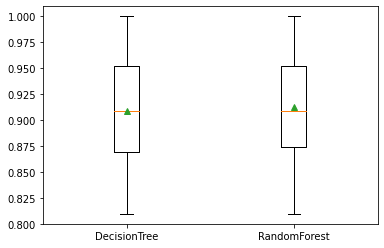

In [15]:
# Graficación para determinar cuál de los dos clasificadores tenemos mejore resultados
# RF RandomForest el que mejor precisión nos da.

import seaborn as sns
import matplotlib.pyplot as plt 

plt.boxplot(resultados, labels=nombres, showmeans=True)
plt.show()

In [16]:
# Limitamos la profundidad del árbol para reducir complejidad y entendimiento
# a 7 niveles, esto nos garantiza un 93.9% de precisión
from sklearn import tree

# Seleccionamos el modelo de DecisionTree que nos dio mucho mejores resultados
# mostrados en la gráfica boxplot anterior con los parámetros predeterminados
modelo_DT = DecisionTreeClassifier(random_state=100, max_depth=7, min_samples_leaf=5)

# Entrenamos con los datos de entrenamiento:
modelo_DT.fit(X_train, y_train)

# Realizamos las predicciones con los datos de validación:
yhat = modelo_DT.predict(X_test)

# Veamos el desempeño en cuanto exactitud (accuracy) del modelo:
print('Exactitud del modelo DT con los datos de prueba: %.1f%%' % (100*modelo_DT.score(X_test,y_test)))

Exactitud del modelo DT con los datos de prueba: 93.9%


In [17]:
# Importemos algunos otros módulos que requeriremos:
from sklearn.metrics import classification_report

print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95        67
           1       0.98      0.85      0.91        53
           2       0.92      0.98      0.95        94

    accuracy                           0.94       214
   macro avg       0.95      0.93      0.94       214
weighted avg       0.94      0.94      0.94       214



In [18]:
# Accuracy usando la libreria
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test, yhat)
print("Accuracy: {:.2f}".format(accuracy))

Accuracy: 0.94


¡Parece ser que obtuvimos un excelente resultado del 94% de accuracy sin mucho esfuerzo.

Sin embargo, no es así. Para percatarnos de lo que está haciendo el modelo que generamos, veamos su matriz de confusión:

In [19]:
from imblearn.metrics import geometric_mean_score, classification_report_imbalanced
print(classification_report_imbalanced(y_test,yhat))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.94      0.96      0.97      0.95      0.96      0.93        67
          1       0.98      0.85      0.99      0.91      0.92      0.83        53
          2       0.92      0.98      0.93      0.95      0.96      0.92        94

avg / total       0.94      0.94      0.96      0.94      0.95      0.90       214



**Comprender la importancia de las características**
FEATURES IMPORTANCE

La importancia de la característica se refiere a una clase de técnicas para asignar puntajes a las características de entrada de un modelo predictivo que indica la importancia relativa de cada característica al hacer una predicción

In [20]:
modelo_DT.feature_importances_

array([0.        , 0.03779718, 0.        , 0.2496153 , 0.19839856,
       0.12587483, 0.1587736 , 0.11933381, 0.        , 0.01266923,
       0.0007607 , 0.        , 0.09677679])

In [21]:
## Calculo de las features importances.
feature_cols = df_nums.columns

feat_importance = modelo_DT.tree_.compute_feature_importances(normalize=False)
feat_imp_dict = dict(zip(feature_cols, modelo_DT.feature_importances_))

feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.rename(columns = {0:'FeatureImportance'}, inplace = True)
feat_imp.sort_values(by=['FeatureImportance'], ascending=False).head()

,FeatureImportance
FLUORUROS_mg/L,0.249615
DUR_mg/L,0.198399
N_NO3_mg/L,0.158774
COLI_FEC_NMP/100_mL,0.125875
AS_TOT_mg/L,0.119334


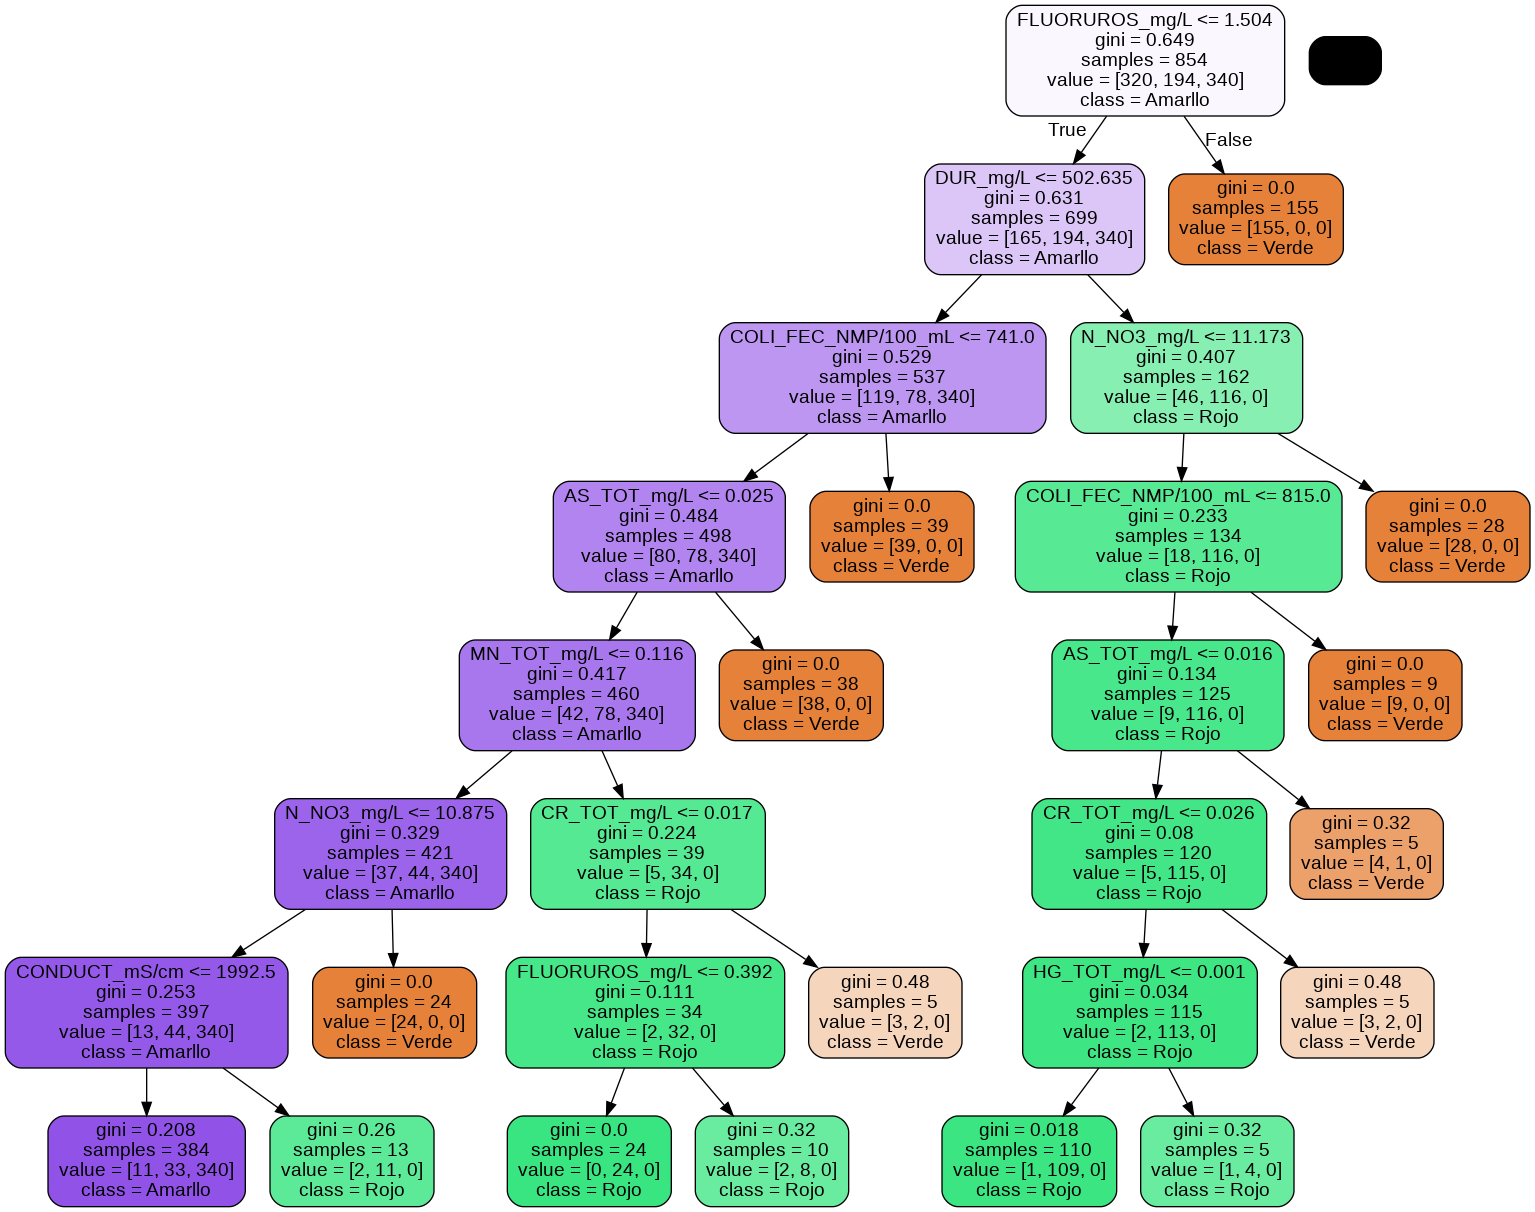

In [22]:
# Dibujemos el arbol ahora
from sklearn.tree import export_graphviz

arbol= export_graphviz (modelo_DT,
                        out_file = None,
                        feature_names= X_train.columns,
                        class_names = ['Verde','Rojo','Amarllo'],
                        rounded = True,
                        filled = True)
import pydotplus
from IPython.display import Image

graph = pydotplus.graph_from_dot_data(arbol)
graph.write_png('Arbol_resultado_DT.png')
Image(filename = 'Arbol_resultado_DT.png')

El árbol de arriba está podado para que podamos visualizar mejor el modelo. No hay significación estadística de usar una profundidad de 7 o una hoja de muestra máxima como 5

# instrucción arriba
modelo_DT = DecisionTreeClassifier(random_state=100, max_depth=7, min_samples_leaf=5)

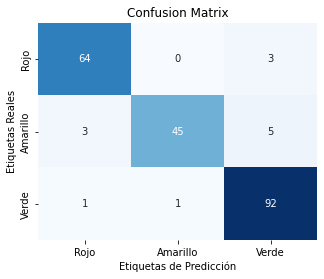

In [23]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, yhat)

# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame( cm,
                      index = ['Rojo','Amarillo','Verde'], 
                      columns = ['Rojo','Amarillo','Verde'])

frecuencia = ["{0:0.0f}".format(value) for value in cm.flatten()]
porcentaje = ["{0:.1%}".format(value) for value in cm.flatten()/np.sum(cm)]

#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True, fmt='', cmap='Blues', cbar=False)

plt.title('Confusion Matrix')
plt.ylabel('Etiquetas Reales')
plt.xlabel('Etiquetas de Predicción')

plt.show()

Analizando nuestra matrix de confusión, vemos que tiene un excelente nivel de asertividad, y son muy pocos los casos que erra el algoritmo.   Podemos concluir que el modelo de árboles como algoritmo para una problematica de multiclase como es el caso, para determinar si la calidad del agua es buena = verde, mala= rojo, con altísimoa probabilidad de precisión.
